# Homework 3

### Setup

In [2]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split

def warn(*args, **kwargs): pass
warnings.warn = warn

df = pd.read_csv('winequality-red.csv', sep=";")

X = df.drop("quality", axis=1)
y = df["quality"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


### 1.

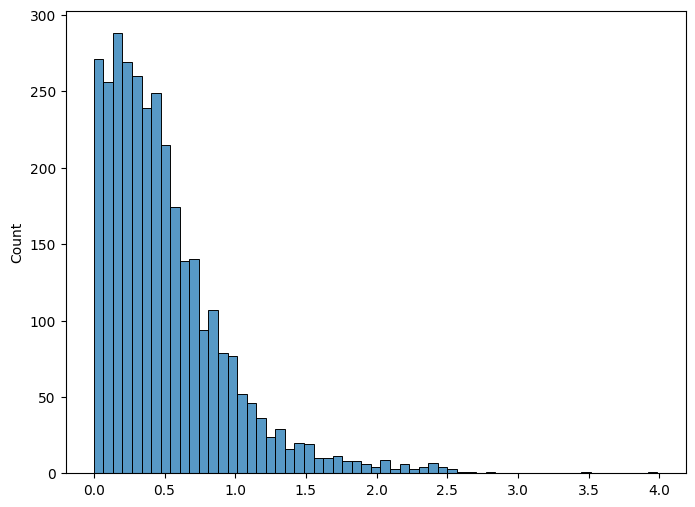

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

residues = []
for i in range(1, 11):
    regressor = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=i)
    regressor.fit(x_train, y_train)
    prediction = regressor.predict(x_test)
    residues += list(abs(prediction - np.array(y_test)))

plt.figure(figsize=(8, 6))
sns.histplot(residues)
plt.show()


### 2.

In [4]:
from sklearn import metrics

round_bound = lambda x : 10 if x > 10 else round(x) if x > 0 else 0

original_mae = 0
rb_mae = 0

for i in range(1, 11):
    regressor = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=i)
    regressor.fit(x_train, y_train)
    prediction = regressor.predict(x_test)

    original_mae += metrics.mean_absolute_error(y_test, prediction)
    rb_prediction = list(map(round_bound, prediction))
    rb_mae += metrics.mean_absolute_error(y_test, rb_prediction)

original_mae /= 10
rb_mae /= 10

print("Original MAE (without round and bound):", round(original_mae, 4))
print("Round and bound MAE:", round(rb_mae, 4))

Original MAE (without round and bound): 0.5097
Round and bound MAE: 0.4388


### 3.

In [5]:
from math import ceil
max_iters = [20, 50, 100, 200]

original_rmse = 0
es_rmse = np.zeros(len(max_iters))

for i in range(1, 11):
    regressor = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=i)
    regressor.fit(x_train, y_train)
    prediction = regressor.predict(x_test)
    original_rmse += metrics.mean_squared_error(y_test, prediction)**0.5

for index, max_iter in enumerate(max_iters):
    for i in range(1, 11):
        regressor = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', validation_fraction=0.2, random_state=i, max_iter=max_iter)
        regressor.fit(x_train, y_train)
        prediction = regressor.predict(x_test)
        es_rmse[index] += metrics.mean_squared_error(y_test, prediction)**0.5


original_rmse /= 10
es_rmse /= 10

print(f"Original RMSE: {original_rmse}")
for i, max_iter in enumerate(max_iters):
    print(f"{max_iter} iterations RMSE: {es_rmse[i]}")


Original RMSE: 0.6706527958221328
20 iterations RMSE: 1.403978950992544
50 iterations RMSE: 0.7996073631460567
100 iterations RMSE: 0.6940361469112146
200 iterations RMSE: 0.6554543932216473


### 4.

O regressor com melhor performance é o que tem 200 iterações. Se olharmos para os modelos de iterações fixas, verificamos que a sua performance melhora quando aumentamos o número de iterações máximas, o que denuncia a possibilidade de existir algum underfitting nos modelos com iterações máximas mais baixas. Relativamente aos modelos com early stop, estes apresentam uma performance pior possivelmente por detetarem prematuramente o início do overfitting e terminarem a aprendizagem cedo demais, não tendo a oportunidade de convergir para valores ótimos.